In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('new_data.csv')
pd.options.display.float_format = '{:,.2f}'.format
df=df[df['category'] == 'MC']
df.head()

,month,account_id,region,category,spend_level,revenue,live_ad,new_AA,paid_ad,listing_fee,...,multi_bump_feature,sa_feature,other_feature,shop_feature,adview_received,adview_per_live_ad_per_day,lead_received,lead_per_live_ad_per_day,spending_per_paid_ads,spending_per_live_ad
14,2020-12-01,88,HN,MC,light,250000,2.00,2.00,2,2,...,0,0,1,1,186.00,7.15,7.00,0.27,"125,000.00","125,000.00"
15,2021-10-01,88,HN,MC,light,95455,11.00,0.00,4,0,...,0,0,0,0,"1,236.00",4.87,22.00,0.09,"23,863.75","8,677.73"
16,2020-10-01,144,HCM,MC,light,359091,NaN,NaN,8,7,...,0,0,0,0,NaN,NaN,NaN,NaN,"44,886.38",NaN
17,2020-11-01,144,HCM,MC,light,504545,8.00,7.00,9,9,...,0,0,0,0,"2,437.00",60.92,105.00,2.62,"56,060.56","63,068.12"
18,2020-12-01,144,HCM,MC,light-medium,604545,9.00,7.00,8,7,...,0,0,0,0,"3,860.00",59.38,172.00,2.65,"75,568.12","67,171.67"


In [3]:
df['month'] = pd.to_datetime(df['month'])
df['month_ex'] = df['month'].dt.month
df['month_ex'].unique()

array([12, 10, 11,  1,  2,  3,  4], dtype=int64)

In [4]:
df = df[ pd.to_datetime(df['month']) > pd.to_datetime("2021-04-01")]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22531 entries, 15 to 73348
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   month                       22531 non-null  datetime64[ns]
 1   account_id                  22531 non-null  int64         
 2   region                      22531 non-null  object        
 3   category                    22531 non-null  object        
 4   spend_level                 22531 non-null  object        
 5   revenue                     22531 non-null  int64         
 6   live_ad                     21165 non-null  float64       
 7   new_AA                      21165 non-null  float64       
 8   paid_ad                     22531 non-null  int64         
 9   listing_fee                 22531 non-null  int64         
 10  bump_feature                22531 non-null  int64         
 11  multi_bump_feature          22531 non-null  int64    

In [6]:
df.month_ex.nunique()

7

Missing Data displayed in %

In [7]:
missing = df.isna().sum()

missing_per = missing/len(df['account_id'])*100
missing_per.sort_values(ascending=False)

lead_per_live_ad_per_day     7.31
lead_received                7.31
adview_per_live_ad_per_day   6.07
adview_received              6.07
spending_per_live_ad         6.06
live_ad                      6.06
new_AA                       6.06
spending_per_paid_ads        0.06
month                        0.00
sa_feature                   0.00
shop_feature                 0.00
other_feature                0.00
multi_bump_feature           0.00
account_id                   0.00
bump_feature                 0.00
listing_fee                  0.00
paid_ad                      0.00
revenue                      0.00
spend_level                  0.00
category                     0.00
region                       0.00
month_ex                     0.00
dtype: float64

#### Average revenue generated by each spend_level

In [8]:
grouped = df.groupby('spend_level')
original_mean_revenue = grouped['revenue'].mean()
original_mean_revenue

spend_level
heavy          6,277,741.64
light            139,858.87
light-medium     732,671.29
medium         1,409,654.22
medium-heavy   2,467,054.87
Name: revenue, dtype: float64

<AxesSubplot:xlabel='spend_level', ylabel='Count'>

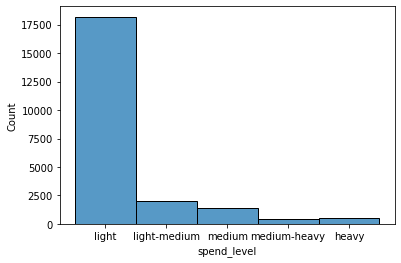

In [9]:
import seaborn as sns

sns.histplot(df['spend_level'])

In [10]:
spend_level = df.groupby('spend_level')
spend_level.revenue.sum().sort_values(ascending=False)

spend_level
heavy           3182815011
light           2544592369
medium          1965057983
light-medium    1462411904
medium-heavy    1085504142
Name: revenue, dtype: int64

### Amount of unique user per spend_level

In [11]:
spend_level['account_id'].nunique()

spend_level
heavy            149
light           6236
light-medium     956
medium           516
medium-heavy     210
Name: account_id, dtype: int64

In [12]:
df.groupby(['spend_level', 'account_id']).revenue.sum().sort_values(ascending=False)

spend_level  account_id
heavy        1079050       517859393
             4619917       203427861
             4229532        86686704
             60943          59990344
             705255         58219294
                             ...    
light        436537                0
             11891836              0
             441567                0
             1718675               0
             12264257              0
Name: revenue, Length: 8067, dtype: int64

In [13]:
spend_level['bump_feature'].sum()

spend_level
heavy           153976
light           119111
light-medium     83582
medium          122519
medium-heavy     67230
Name: bump_feature, dtype: int64

## Seperating light and light-medium user for analysis

In [14]:
df_light = df[df['spend_level'].isin(['light', 'light-medium'])]

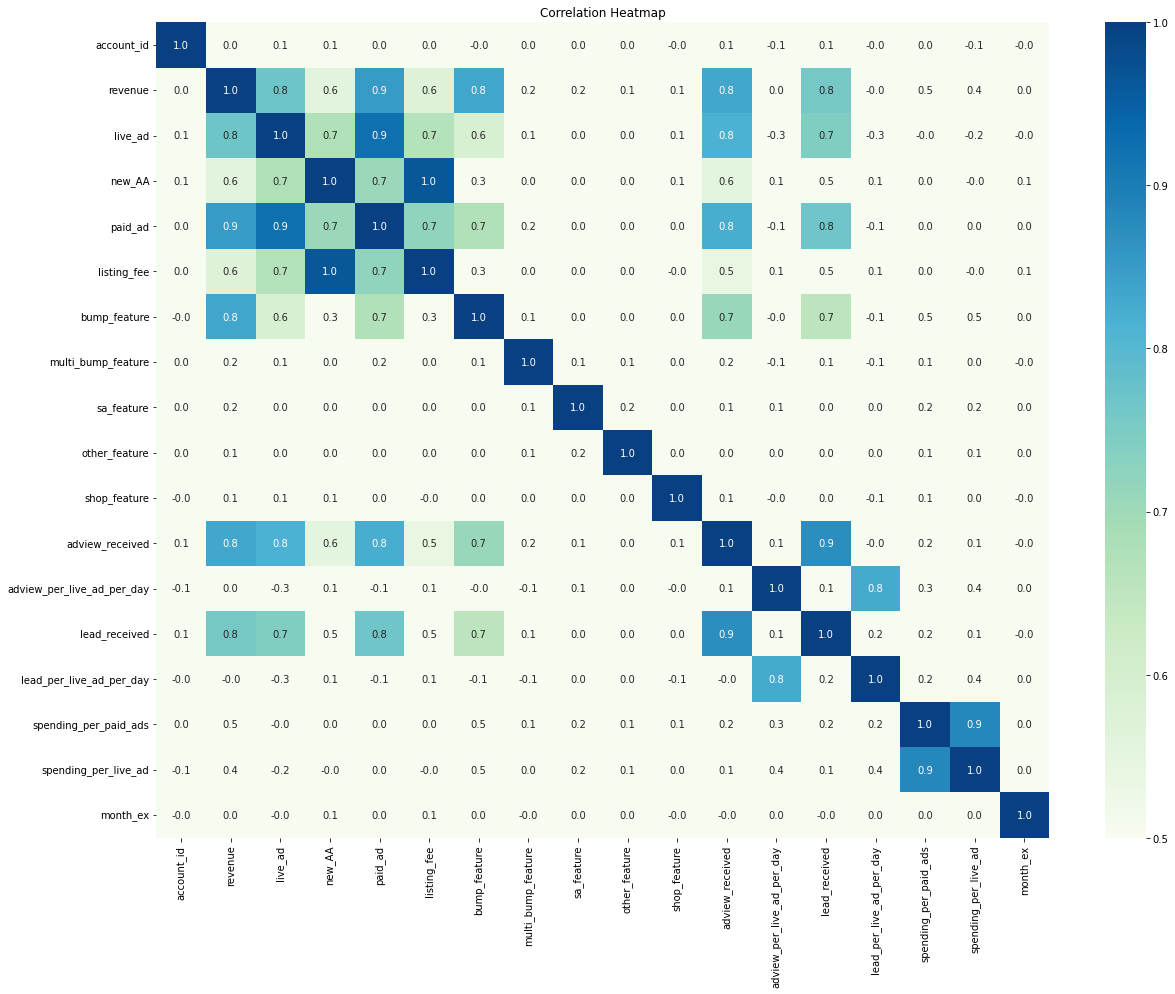

In [15]:
corr_mat_spearman = df_light.corr(method='spearman')
plt.figure(figsize=(20,15))
sns.heatmap(corr_mat_spearman,
            annot=True,
            fmt='.1f',
            cmap='GnBu',
            vmin=0.5,
            vmax=1)
title = plt.title('Correlation Heatmap')

In [16]:
df_high = df[df['spend_level'].isin(['light', 'light-medium', 'medium', 'medium-heavy'])]

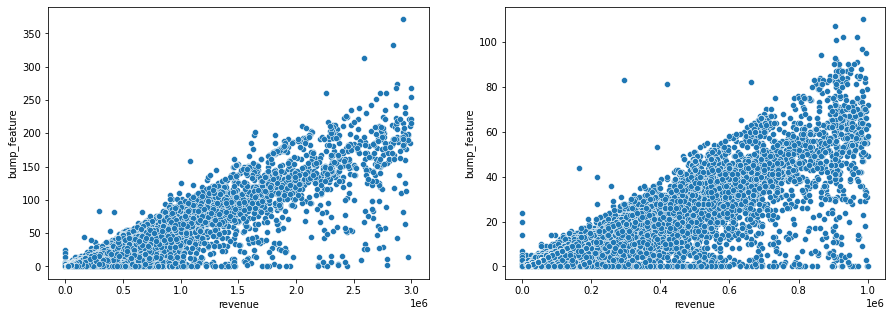

In [17]:
fig,axes= plt.subplots(1,2, figsize=(15,5))

sns.scatterplot(ax=axes[0],y=df_high['bump_feature'], x=df_high['revenue']) 
sns.scatterplot(ax=axes[1],y=df_light['bump_feature'], x=df_light['revenue'])
plt.show()

Scatter shows high bump_feature usage **correlately strongly** with revenue. But interestingly, higher revenue does not indicate higher bump usage.

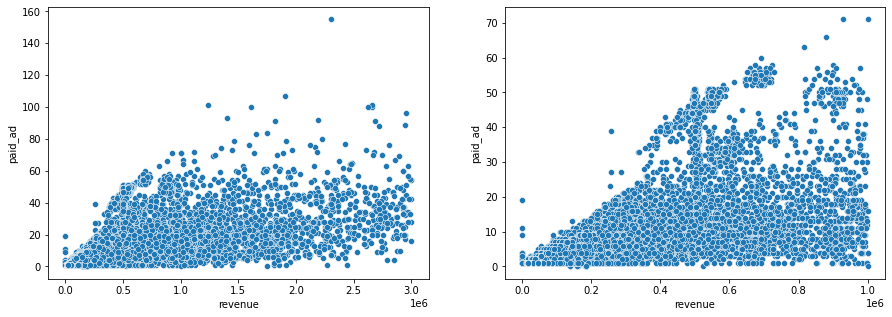

In [18]:
fig,axes= plt.subplots(1,2, figsize=(15,5))

sns.scatterplot(ax=axes[0],y=df_high['paid_ad'], x=df_high['revenue']) 
sns.scatterplot(ax=axes[1],y=df_light['paid_ad'], x=df_light['revenue'])
plt.show()

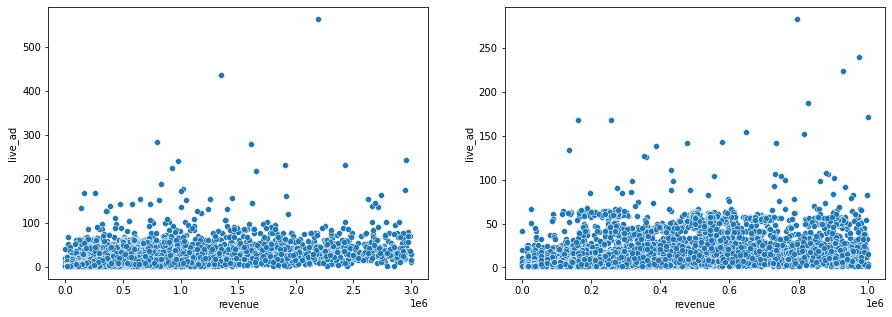

In [19]:
fig,axes= plt.subplots(1,2, figsize=(15,5))

sns.scatterplot(ax=axes[0],y=df_high['live_ad'], x=df_high['revenue']) 
sns.scatterplot(ax=axes[1],y=df_light['live_ad'], x=df_light['revenue'])
plt.show()

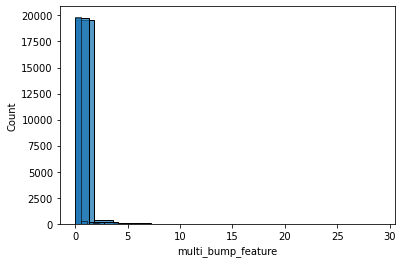

In [20]:
sns.histplot(df_light['multi_bump_feature'])
sns.histplot(df_light['sa_feature'])
sns.histplot(df_light['other_feature'])
plt.show()

<AxesSubplot:xlabel='revenue'>

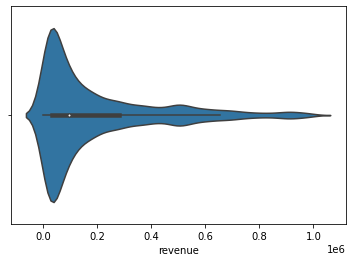

In [21]:
sns.violinplot(x=df_light.revenue)

<AxesSubplot:xlabel='revenue', ylabel='Proportion'>

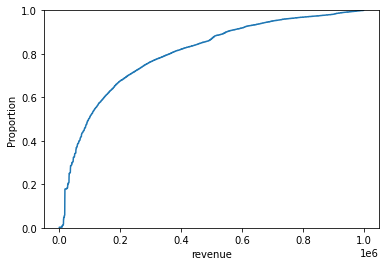

In [22]:
sns.ecdfplot(df_light.revenue)

CDF shows 80% of light and light-medium users spent about 400,000 or less. The longtail on Violin plot indicates a small amount of outliers, spending up to 1,000,000.

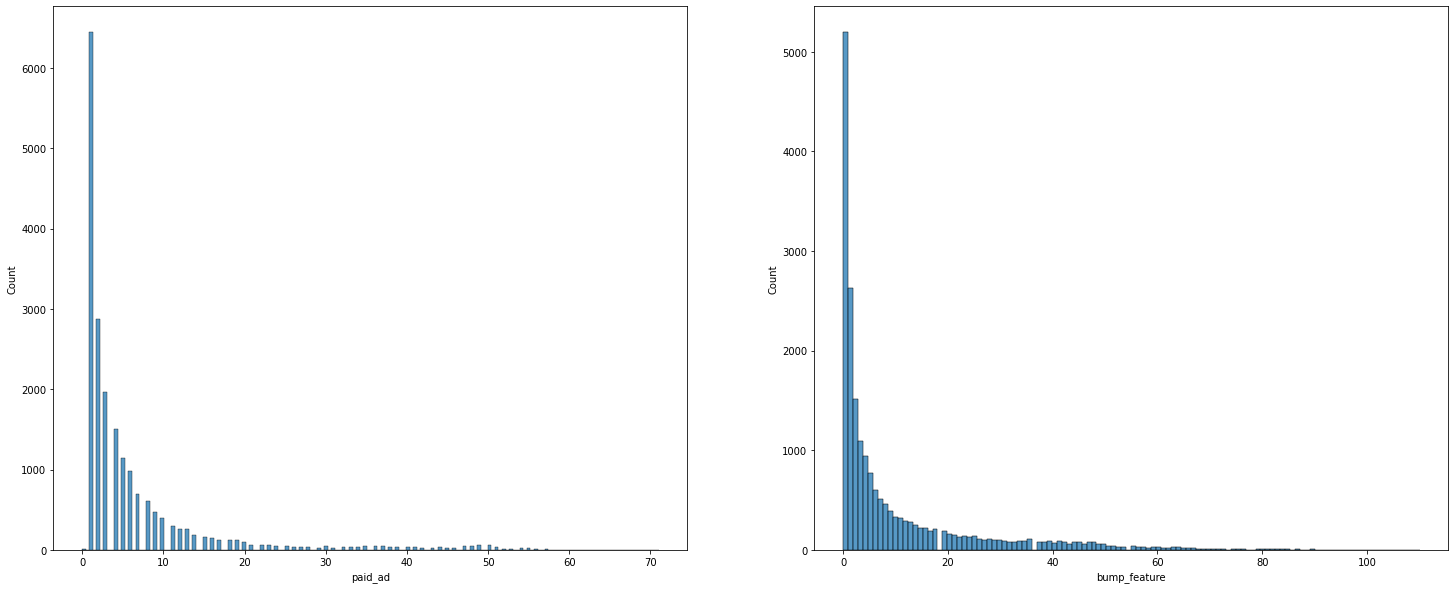

In [23]:
col = ['paid_ad', 'bump_feature']
fig,axes= plt.subplots(1,2, figsize=(25,10))
for u, i in enumerate(col):
    sns.histplot(df_light[i],ax=axes[u])
plt.show()

Int64Index([1, 2, 3, 4, 10, 11, 12], dtype='int64', name='month_ex')


<AxesSubplot:xlabel='month_ex'>

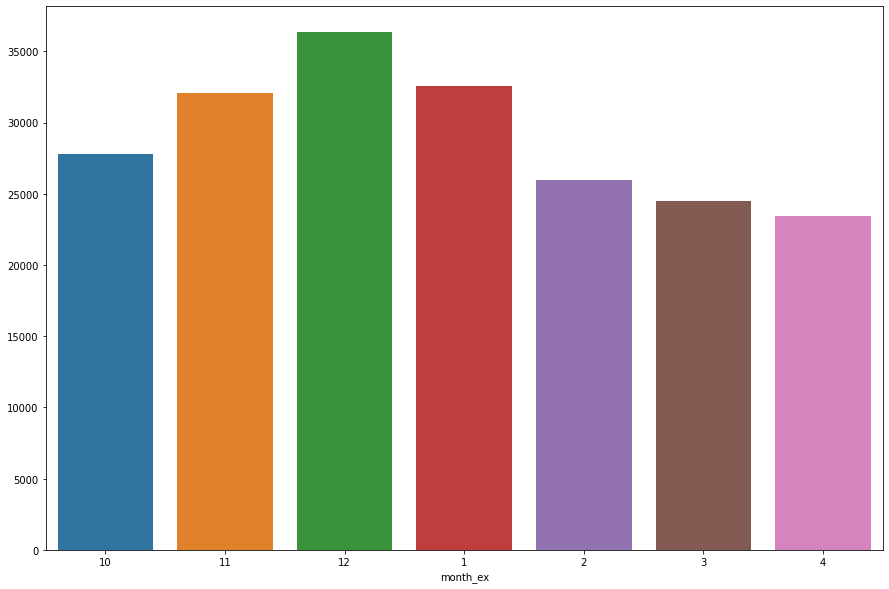

In [24]:
month = df_light.groupby('month_ex')
X = month.bump_feature.sum()
print(X.index)
plt.figure(figsize=(15,10))
sns.barplot(y=X.values,x=X.index,order=[10,11,12,1,2,3,4])

Recalculate correlation using Spearman to eliminiate outliers and skewed distributions, takes into account non-linear relationship.

----
### Detecting "LOST", aka the amount of user leaving the platform starting in January. 

In [25]:
beg_period = [10,11,12,1,2]
end_period = [3,4]
active_month = df.groupby('account_id').month_ex.unique()
bool_res = []
for i in active_month:
    bool_res.append(
        any(np.in1d(i,beg_period)) and not(any(np.in1d(i, end_period))) ## if one element is in beg_period and none in end_period
    )
leaving_user = active_month[bool_res]
leaving_user

account_id
88                        [10]
515                 [12, 1, 2]
1720                      [10]
1722        [10, 11, 12, 1, 2]
2015                      [11]
                   ...        
22271397                   [2]
22271414                   [2]
22271440                   [2]
22271469                   [2]
22271495                   [2]
Name: month_ex, Length: 2481, dtype: object

In [26]:
df_lost = df.loc[df['account_id'].isin(leaving_user.index)]

In [27]:
df_lost['account_id'].nunique()

2481

In [28]:
df_lost_grouped = df_lost.groupby('spend_level')
print(df_lost_grouped.revenue.mean())

spend_level
heavy          3,098,834.50
light             73,228.30
light-medium     731,030.69
medium         1,370,343.63
medium-heavy   2,684,514.00
Name: revenue, dtype: float64


---
### Comparing attributes of revenue and ad between lost and original_group

In [29]:
per_difference = df_lost_grouped['bump_feature'].mean()/grouped['bump_feature'].mean()
lost_bump = df_lost_grouped['bump_feature'].mean()
ori_bump = grouped['bump_feature'].mean()
bump_ad_comparision = pd.concat([lost_bump,ori_bump,per_difference], keys=["bump_feature lost group", "bump_feature original group","% lost/original"], axis=1)
bump_ad_comparision

,bump_feature lost group,bump_feature original group,% lost/original
spend_level,,,
heavy,14.50,303.70,0.05
light,2.92,6.55,0.45
light-medium,46.10,41.87,1.10
medium,73.96,87.89,0.84
medium-heavy,191.25,152.80,1.25


In [30]:
per_difference = df_lost_grouped['live_ad'].mean()/grouped['live_ad'].mean()
lost_live = df_lost_grouped['live_ad'].mean()
ori_live = grouped['live_ad'].mean()
live_ad_comparision = pd.concat([lost_live,ori_live,per_difference], keys=["live_ad lost group", "live_ad original group","% lost/original"], axis=1)
live_ad_comparision

,live_ad lost group,live_ad original group,% lost/original
spend_level,,,
heavy,67.50,205.42,0.33
light,3.16,7.12,0.44
light-medium,14.01,23.44,0.60
medium,19.29,26.29,0.73
medium-heavy,37.25,39.38,0.95


In [31]:
per_difference_rev = df_lost_grouped['revenue'].mean()/grouped['revenue'].mean()
lost_rev = df_lost_grouped['revenue'].mean()
ori_rev = grouped['revenue'].mean()
rev_comparision = pd.concat([lost_rev,ori_rev,per_difference_rev], keys=["revenue lost group", "revenue original group","% lost/original"], axis=1)
rev_comparision

,revenue lost group,revenue original group,% lost/original
spend_level,,,
heavy,"3,098,834.50","6,277,741.64",0.49
light,"73,228.30","139,858.87",0.52
light-medium,"731,030.69","732,671.29",1.00
medium,"1,370,343.63","1,409,654.22",0.97
medium-heavy,"2,684,514.00","2,467,054.87",1.09


In [32]:
per_difference_rev = df_lost_grouped['paid_ad'].mean()/grouped['paid_ad'].mean()
lost_paid_ad = df_lost_grouped['paid_ad'].mean()
ori_paid_ad = grouped['paid_ad'].mean()
rev_comparision = pd.concat([lost_rev,ori_rev,per_difference_rev], keys=["paid_ad lost group", "paid_ad original group","% lost/original"], axis=1)
rev_comparision

,paid_ad lost group,paid_ad original group,% lost/original
spend_level,,,
heavy,"3,098,834.50","6,277,741.64",0.57
light,"73,228.30","139,858.87",0.44
light-medium,"731,030.69","732,671.29",0.58
medium,"1,370,343.63","1,409,654.22",0.76
medium-heavy,"2,684,514.00","2,467,054.87",1.04


In [33]:
per_difference_rev = df_lost_grouped['lead_per_live_ad_per_day'].mean()/grouped['lead_per_live_ad_per_day'].mean()
lost_rev = df_lost_grouped['lead_per_live_ad_per_day'].mean()
ori_rev = grouped['lead_per_live_ad_per_day'].mean()
rev_comparision = pd.concat([lost_rev,ori_rev,per_difference_rev], keys=["lead/ad lost group", "lead/ad original group","% lost/original"], axis=1)
rev_comparision

,lead/ad lost group,lead/ad original group,% lost/original
spend_level,,,
heavy,0.20,1.33,0.15
light,2.14,1.87,1.14
light-medium,1.12,1.16,0.96
medium,1.32,1.16,1.14
medium-heavy,1.35,1.07,1.26


In [34]:
rev_lost = df_lost.groupby(['spend_level','category']).revenue.mean()
rev_ori = df.groupby(['spend_level','category']).revenue.mean()
per_diff = df_lost.groupby(['spend_level','category']).revenue.mean() / df.groupby(['spend_level','category']).revenue.mean()
rev_comp = pd.concat([rev_lost,rev_ori,per_diff], keys = ["rev lost", "rev ori", "% lost/ori"], axis=1)
rev_comp

,,rev lost,rev ori,% lost/ori
spend_level,category,,,
heavy,MC,"3,098,834.50","6,277,741.64",0.49
light,MC,"73,228.30","139,858.87",0.52
light-medium,MC,"731,030.69","732,671.29",1.00
medium,MC,"1,370,343.63","1,409,654.22",0.97
medium-heavy,MC,"2,684,514.00","2,467,054.87",1.09


----
Seperating dataframe by 2 level, *(light,light-medium)* users and *(medium)* users, then filter out the users who did not appear in both groups.

In [35]:
light = df[df['spend_level'].isin(['light','light-medium'])]
med = df[df['spend_level'] == 'medium']

---
Here we show the most recent date that:
- a user has appeared in light or light_medium spend group.
- a user has appeared in medium group

We the compare the corresponding date of both dataFrame. If the results yields:
- True: User has switched light/light-medium ==> medium
- False: User has switched medium ==> light/light-medium

Note: State of spend_level can fluctuate month-to-month (A user can switch between 2 groups multiple times)

In [36]:
cross_tab_med = med[med['account_id'].isin(light['account_id'])]
ct_med = cross_tab_med.groupby('account_id').month.max()

cross_tab_light = light[light['account_id'].isin(med['account_id'])]
ct_light = cross_tab_light.groupby('account_id').month.max()

In [37]:
(ct_light <= ct_med)

account_id
2013        False
2186        False
2977         True
3048        False
5065         True
            ...  
21837387     True
21979146     True
22397946     True
22470054     True
22482194     True
Name: month, Length: 402, dtype: bool

In [38]:
print(f'Medium ==> light: {755 - (ct_light <= ct_med).sum() }\nLight ==> Medium {(ct_light <= ct_med).sum()} ', )

Medium ==> light: 555
Light ==> Medium 200 
